# End-to-end Dog Breed Classifiacation


## Problem
Identifying the breed of a dog given an image of dog.


## Data
This data we are using is from Kaggles dog breed identification competetion.
https://www.kaggle.com/competitions/dog-breed-identification/data


## Evaluation
The data we are using is from Kaggle dog breed of each test image.
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## Features
* We are dealing with images so it is probably best to use deep learning model
* There are 120 breeds of dogs
* Around 10,000+ photos in traing set
* Around 10,000+ images in test set

In [6]:
## !pip install tensorflow
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 3.2 MB/s eta 0:00:00


In [28]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
print('TF version:',tf.__version__)
print('TF hub:',hub.__version__)

print('GPU','availaible (YESSSS!!!)' if tf.config.list_physical_devices('GPU') else 'not availaible :(')

TF version: 2.13.0-rc1
TF hub: 0.13.0
GPU not availaible :(


## Getting our data ready

In [11]:
import pandas as pd
labels_csv = pd.read_csv('dog-breed-identification/labels.csv')
labels_csv.describe()


id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [12]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

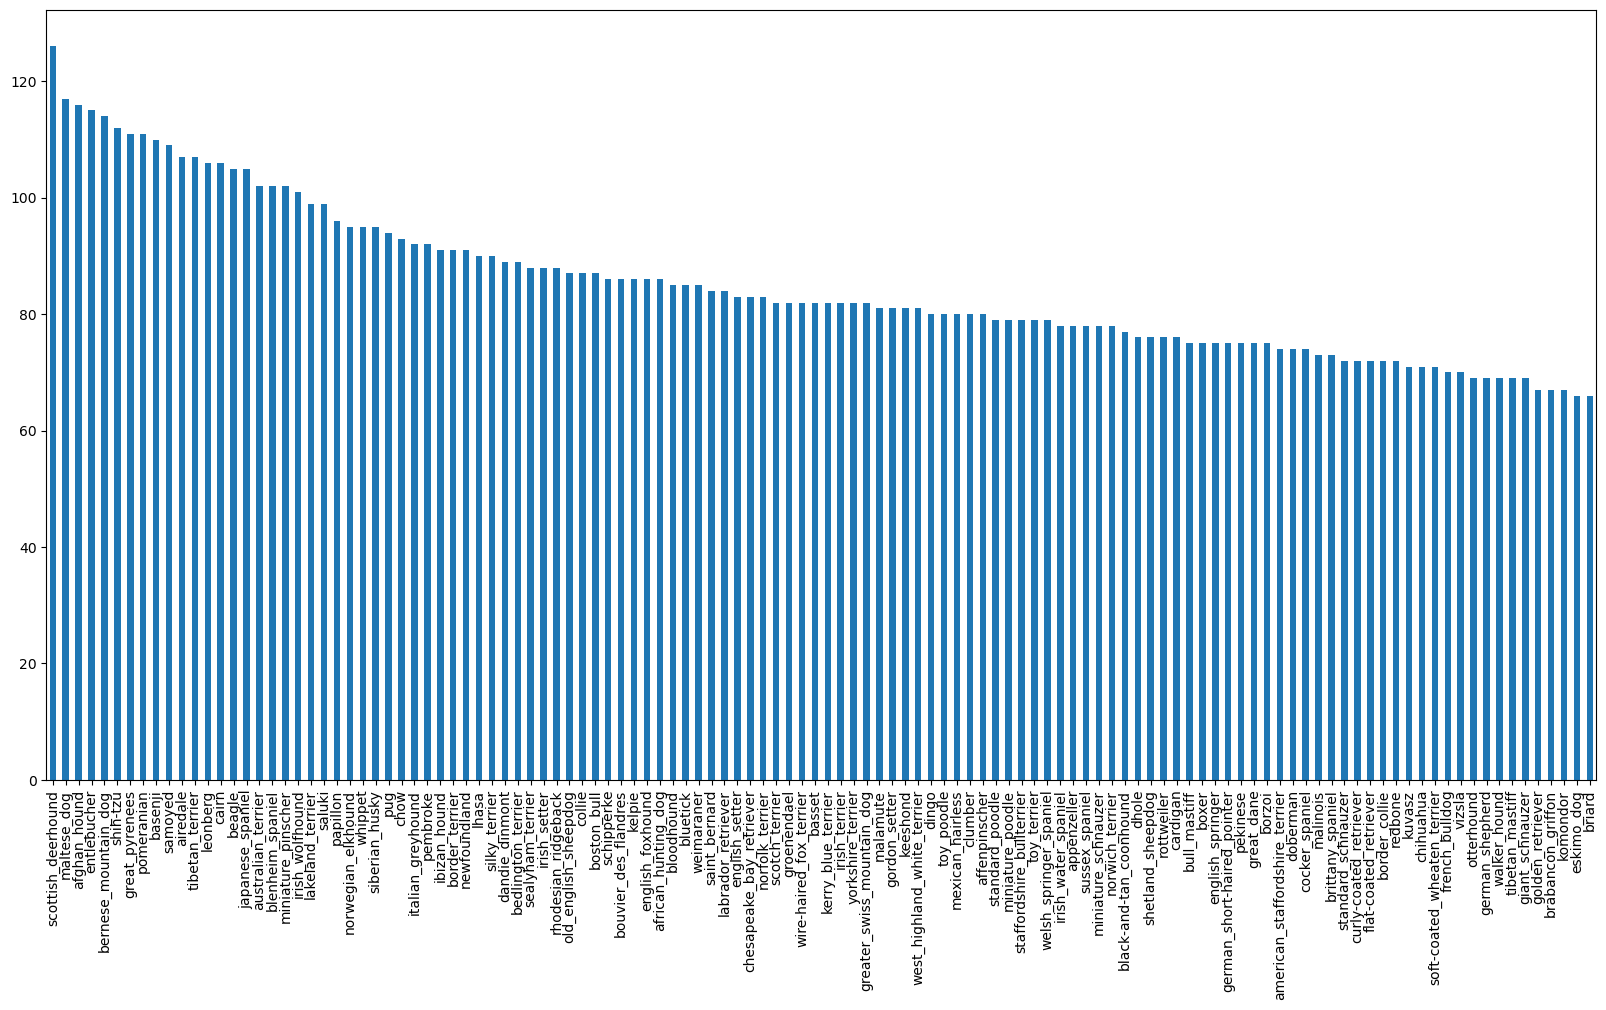

In [18]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

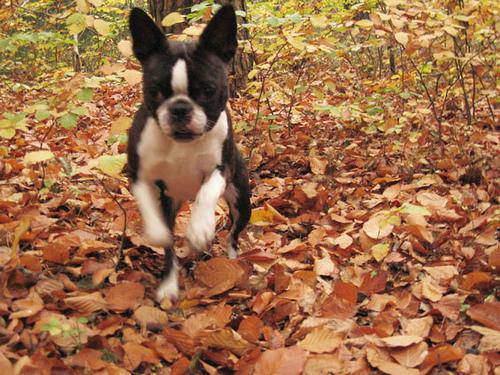

In [20]:
from IPython.display import Image
Image('dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [23]:
filenames = ['dog-breed-identification/train/' + fname+ '.jpg' for fname in labels_csv['id']]
filenames[:5]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [27]:
import os
if len(os.listdir('dog-breed-identification/train/')) == len(filenames):
    print('Same amount of files')
else:
    print('No same amount of files')

Same amount of files


In [29]:
# Converting to array
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [30]:
if len(labels) == len(filenames):
    print('same amount')
else:
    print('not same amount')

same amount


In [32]:
unique_breeds = np.unique(labels)
len(unique_breeds), unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [35]:
# Turning label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [36]:
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating a validation set

In [37]:
# Setup x and y variables
x = filenames
y = boolean_labels

### We now experiment on 1000 images

In [40]:
NUM_IMAGES = 1000 

In [41]:
from sklearn.model_selection import train_test_split

x_train , x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(x_train), len(y_train), len(x_val),len(y_val)

(800, 800, 200, 200)

## Preprocessing Images 

In [42]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [45]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [47]:
# Image into tensors
tf.constant(image[:2]) 

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [48]:
IMG_SIZE = 224

def process_image(image_path):
    # Read an image file
    image = tf.io.read_file(image_path)
    # Turning jpeg inamge into number tensor with 3 colour (Red,Green,Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image,tf.float32)
    # Resize the image 
    image  = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
    
    return image

## Turning our data into batches(32 a time)

In [49]:
def get_image_label(image_path,label):
    image = process_image(image_path)
    return image,label

In [50]:
get_image_label(x[42],y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [55]:
BATCH_SIZE = 32

def create_data_batches(x,y=None,batch_size=BATCH_SIZE, valid_data=False,test_data=False):
    if test_data:
        print('Creating test data batches')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data:
        print('Creating validation data batches')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # Filepaths
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
                        
    else:
        print('Creating train data batches')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # Filepaths
        data = data.shuffle(buffer_size=len(x))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch


In [56]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)

Creating train data batches
Creating validation data batches


In [57]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data batches

In [67]:
def show_images(images,labels):
    # Setup the figure
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Arranging the images
        ax = plt.subplot(5, 5, i+1)
        # Show images
        plt.imshow(images[i])
        # Show titles
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis('off')

In [68]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

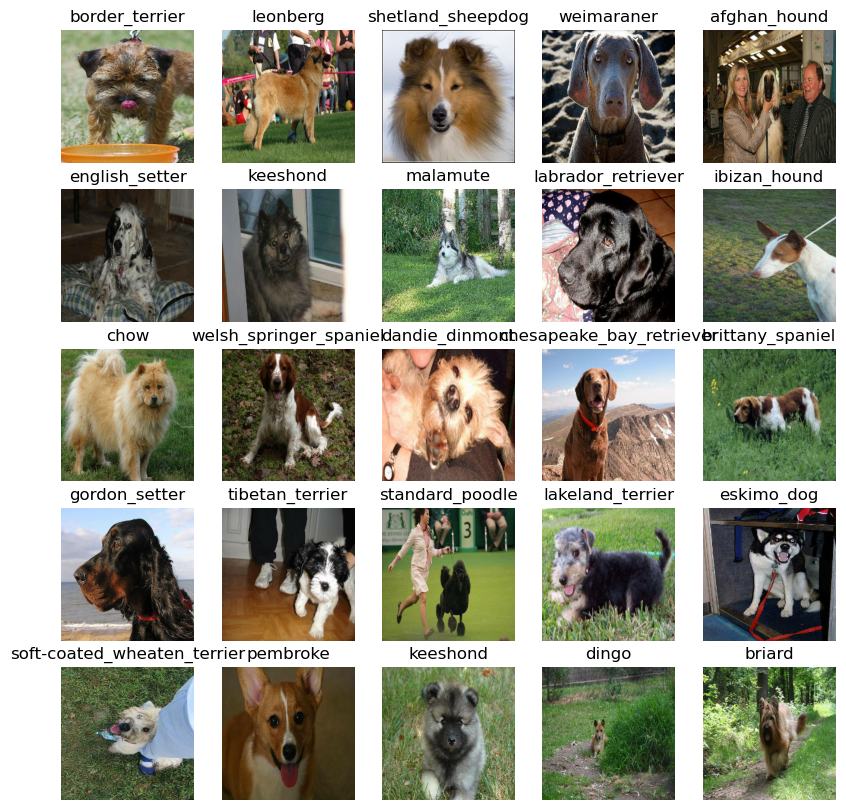

In [69]:
show_images(train_images,train_labels)

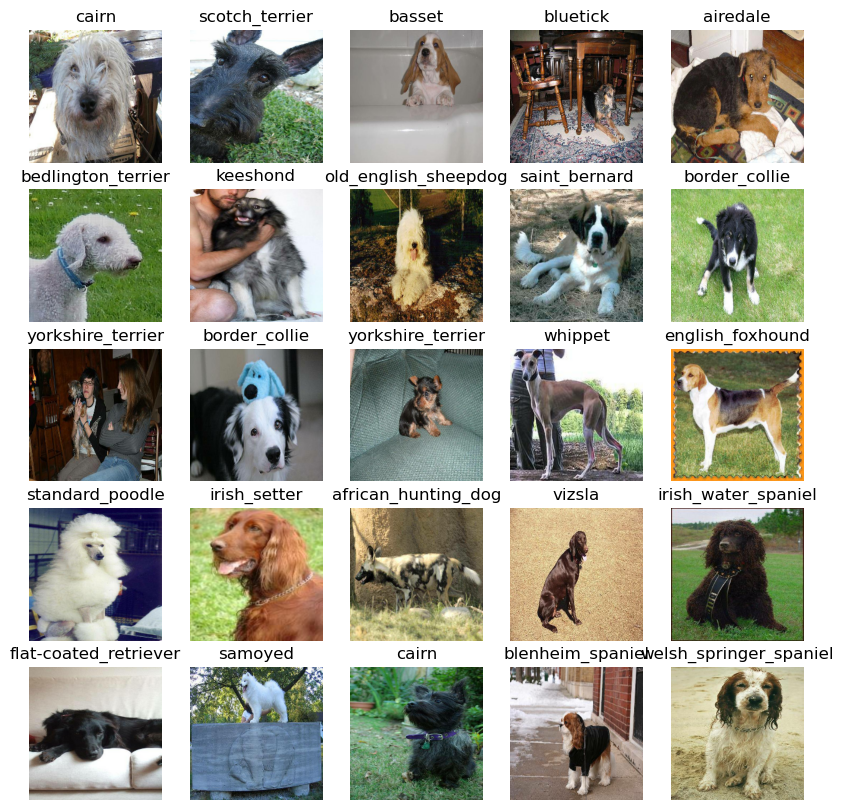

In [71]:
val_image, val_labels = next(val_data.as_numpy_iterator())
show_images(val_image,val_labels)

## Building a model

In [72]:
# Defining how our input will look like
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE,3] # batch,height,width,colour channels

# Setup output shape of model
OUTPUT_SHAPE = len(unique_breeds)

# Model Url
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

 #### Using Keras deep learning model

In [210]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print('Building model...')
    # Setup the model
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),# Layer 1(input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,# Layer 2(output layer)
                             activation='softmax')
    ])
    # Compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )
    model.build(INPUT_SHAPE)
    
    return model

In [75]:
model = create_model()
model.summary()

Building model...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks 
Helper functions , used during training to save its progress, check its progress or stop trainig if a model stops improving

In [78]:
# Tracking model progress using tensorboard
%load_ext tensorboard



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [79]:
import datetime

def create_tensorboard_callback():
    # Making a log directory
    logdir = os.path.join('logs',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
                         )
    return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

In [80]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=3)

## Training a model(on subset of data)

In [81]:
# Epochs are no of time our model visit data set
NUM_EPOCHS = 100

In [82]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    # Fit the model
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data = val_data,
             validation_freq = 1,
             callbacks = [tensorboard,early_stopping])
    return model

In [83]:
model = train_model()

Building model...


Epoch 1/100
25/25 [==============================] - 16s 570ms/step - loss: 4.4961 - accuracy: 0.0913 - val_loss: 3.3590 - val_accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - 14s 569ms/step - loss: 1.5947 - accuracy: 0.6862 - val_loss: 2.1231 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 14s 566ms/step - loss: 0.5518 - accuracy: 0.9388 - val_loss: 1.6799 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 14s 581ms/step - loss: 0.2538 - accuracy: 0.9900 - val_loss: 1.4637 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 15s 588ms/step - loss: 0.1464 - accuracy: 0.9975 - val_loss: 1.3961 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 16s 625ms/step - loss: 0.1006 - accuracy: 1.0000 - val_loss: 1.3517 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 17s 687ms/step - loss: 0.0755 - accuracy: 1.0000 - val_loss: 1.3256 - val_accuracy:

In [85]:
# Visualize the result
%tensorboard --logdir logs

## Making and evaluating predictions

In [86]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 3s 387ms/step


array([[5.03439514e-04, 4.42229757e-05, 6.57647615e-04, ...,
        1.13213624e-04, 3.66378808e-05, 4.39125532e-03],
       [6.52889546e-04, 1.68252081e-04, 1.90811942e-03, ...,
        3.39335907e-04, 1.23866776e-03, 6.52470917e-05],
       [5.52917390e-06, 1.21239900e-05, 4.40651866e-06, ...,
        5.43316528e-05, 1.68900510e-06, 1.60095980e-04],
       ...,
       [1.05507172e-06, 2.17855159e-05, 1.30753178e-05, ...,
        2.41899738e-06, 3.48237481e-05, 6.86406929e-05],
       [1.17165633e-02, 7.68102254e-05, 2.06162644e-04, ...,
        3.17778933e-04, 3.94771414e-05, 3.84250470e-02],
       [3.41365143e-04, 3.07382943e-05, 2.06369106e-04, ...,
        5.39613841e-03, 1.11546728e-03, 2.93375106e-05]], dtype=float32)

In [87]:
predictions.shape

(200, 120)

In [88]:
len(y_val)

200

In [89]:
len(unique_breeds)

120

In [113]:
index=2
print(f"Max Value: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Max Value: 0.9806511998176575
Sum: 0.9999998807907104
Max index: 8
Predicted label: basset


In [114]:
unique_breeds[8]

'basset'

In [115]:
def get_pred_label(prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]

pred_label =  get_pred_label(predictions[81])
pred_label

'chihuahua'

In [125]:
def unbatchify(data):
    '''
    unbatch data and return seperate arrays of images and labels
    '''
    images = []
    labels = []
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
        
    return images, labels

val_images , val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [143]:
print(f"Length of predictions: {len(predictions)}")
print(f"Length of val_labels: {len(val_labels)}")
print(f"Length of val_images: {len(val_images)}")


Length of predictions: 200
Length of val_labels: 200
Length of val_images: 200


In [141]:
# Visualizing prediction
def plt_pred(prediction_probablities, labels, images,n=1):
    pred_prob, true_label, image = prediction_probablities[n],labels[n],images[n]
    # Gat the pred label
    pred_label = get_pred_label(pred_prob)
    # Plot images
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label ==true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title('{}{:2.0f}% {}'.format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                    color=color)

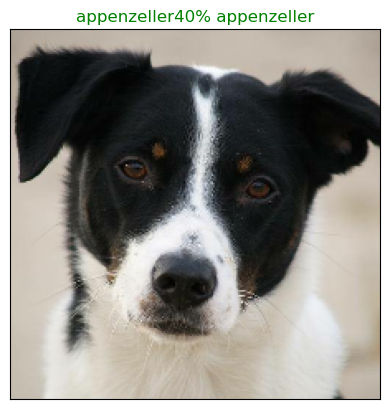

In [146]:
plt_pred(prediction_probablities=predictions,
        labels=val_labels,
        images=val_images,
        n=199)

### Visualizing models top predictions


In [147]:
def plot_pred_conf(prediction_porbablities, labels,n=1):
    pred_prob, true_label = prediction_porbablities[n], labels[n]
    # Predicted label
    pred_label= get_pred_label(pred_prob)
    # Top10
    top_10 = pred_prob.argsort()[-10:][::-1]
    top_10_values = pred_prob[top_10]
    top_10_labels = unique_breeds[top_10]
    
    # PLot it in graph
    top_plot = plt.bar(np.arange(len(top_10_labels)),
                      top_10_values,
                      color='grey')
    plt.xticks(np.arange(len(top_10_labels)),
              labels = top_10_labels,
              rotation='vertical')
    # To see which label is correct
    if np.isin(true_label,top_10_labels):
        top_plot[np.argmax(top_10_labels == true_label)].set_color('green')
    else:
        pass

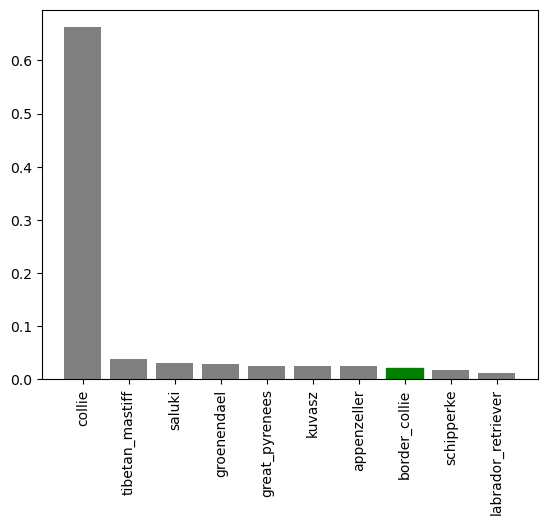

In [150]:
plot_pred_conf(prediction_porbablities=predictions,
              labels = val_labels,
              n=9)

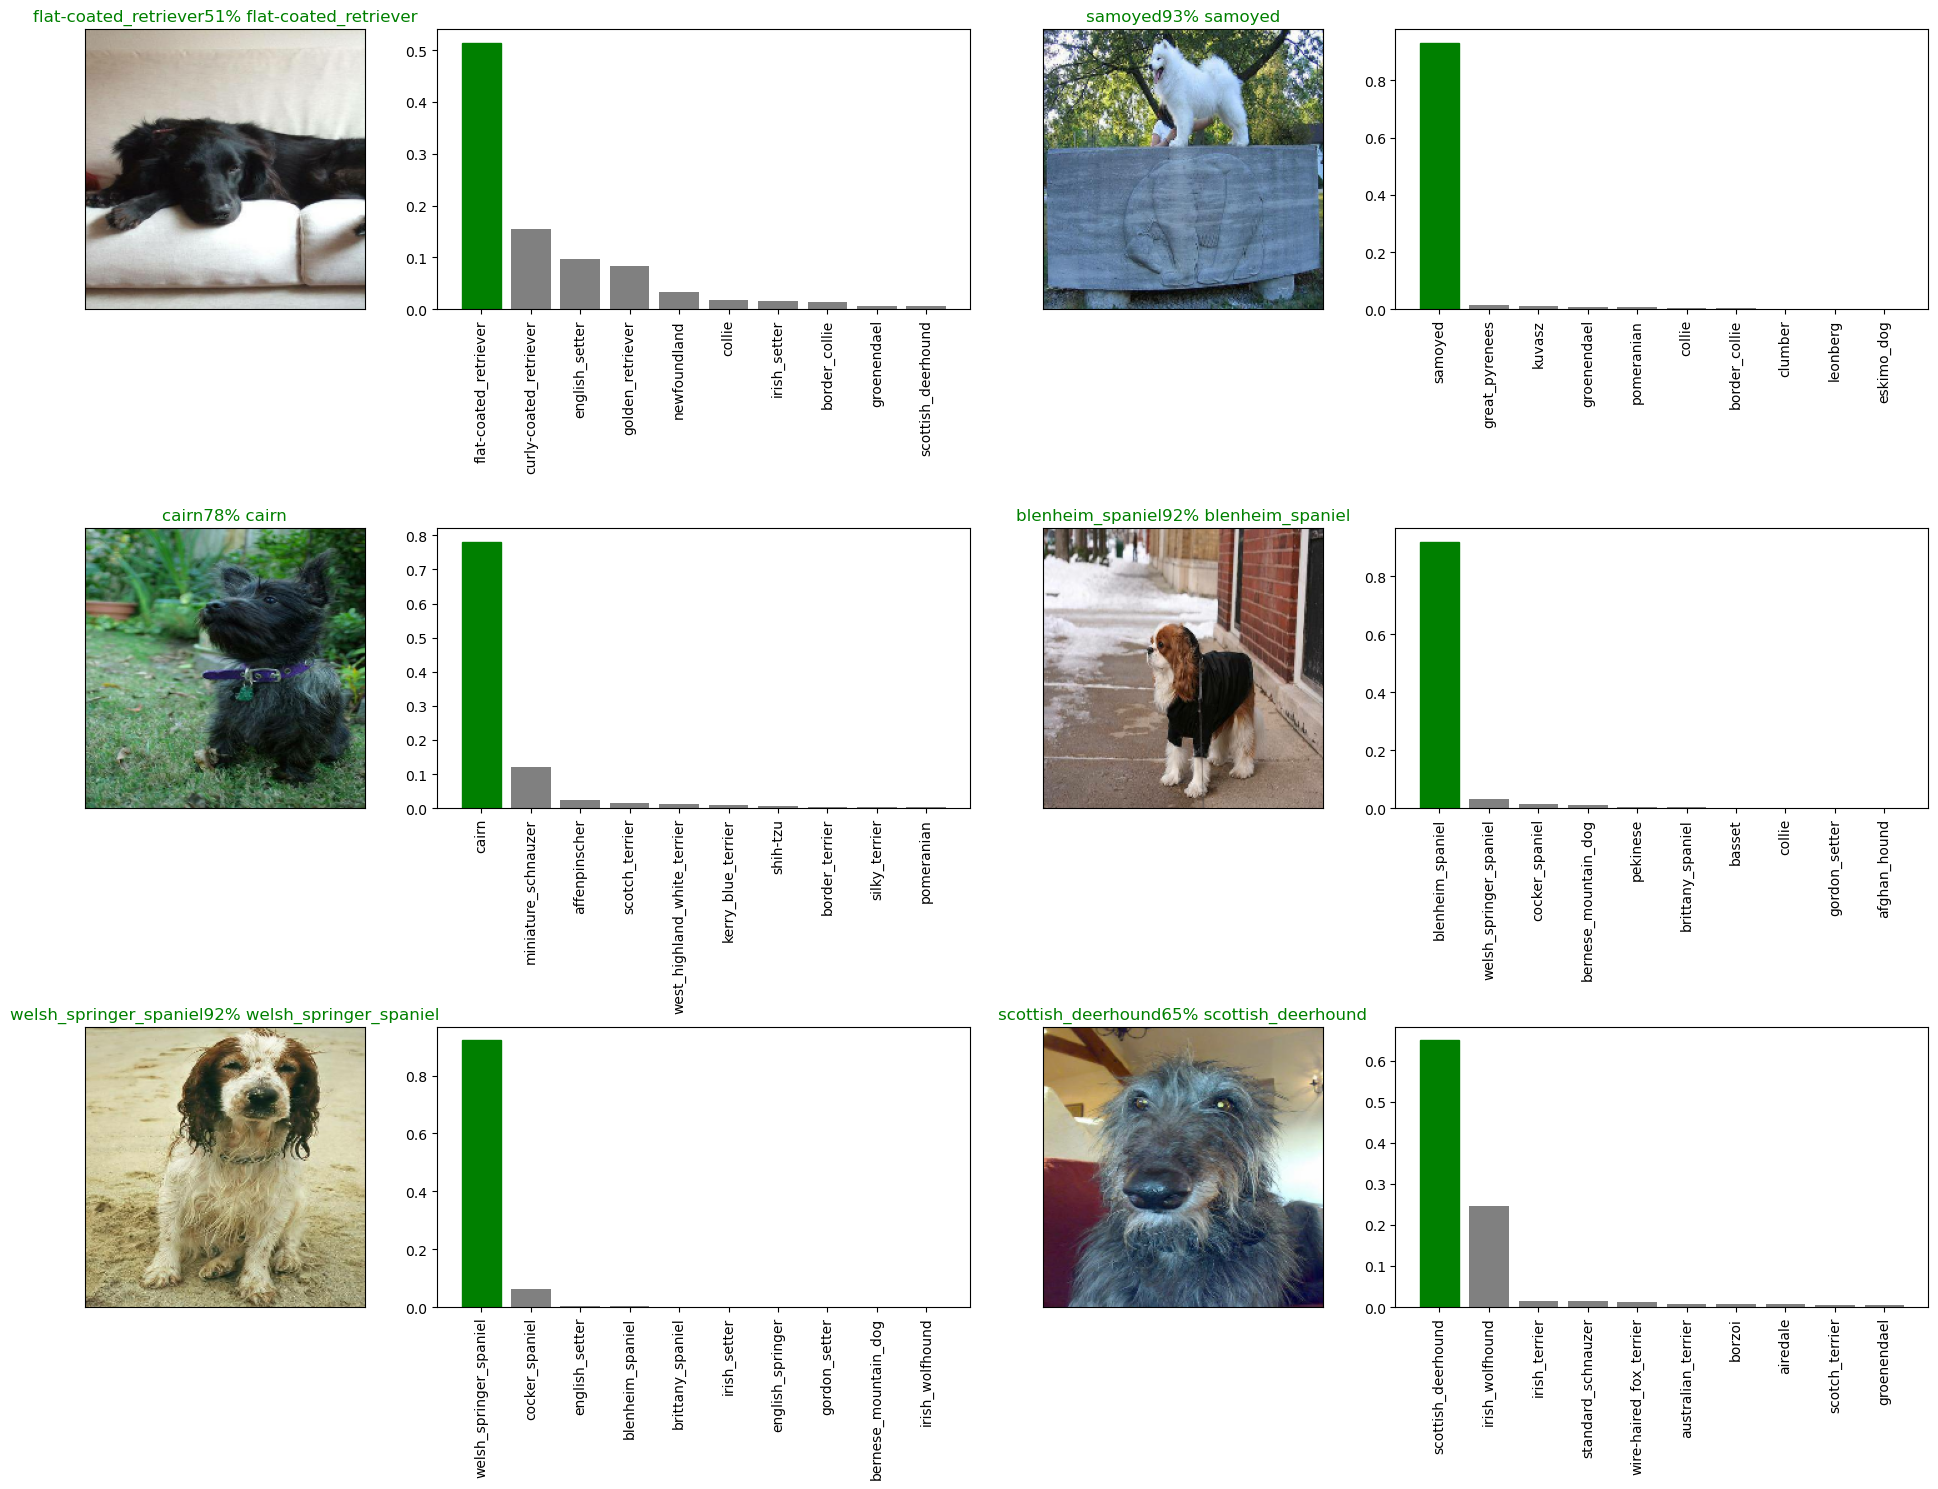

In [180]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols ,2*i+1)
    plt_pred(prediction_probablities= predictions,
             labels = val_labels,
             images = val_images,
             n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols,2*i+2)
    plot_pred_conf(prediction_porbablities=predictions,
                  labels=val_labels,
                  n=i+i_multiplier)
    plt.tight_layout(h_pad=1.0)
plt.show()

### Saving a trained model

In [160]:
def save_model(model,suffix=None):
    modeldir = os.path.join('Model',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir + '-' + suffix + '.h5'
    print('Saving model')
    model.save(model_path)
    return model_path

In [161]:
# Loading a trained model
def load_model(model_path):
    print('Loading saved model')
    model = tf.leras.models.load_model(model_path,
                                      custom_objects={'KerasLayer': hub.KerasLayer})
    return model

In [162]:
save_model(model, suffix='1000-Images-Model')

Saving model


/Users/vipulbhatia/my_code/ML/Dog-Breed-Prediction/env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'Model/20230621-22431687367589-1000-Images-Model.h5'

## Training model on full dataset

In [163]:
full_data = create_data_batches(x,y)

Creating train data batches


In [164]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [165]:
full_model = create_model()

Building model...


In [166]:
# Create callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_eary_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                           patience=3)

In [167]:
# Create a model with full data set
full_model.fit(x = full_data,
              epochs = NUM_EPOCHS,
              callbacks=[full_model_tensorboard,full_model_eary_stopping])

Epoch 1/100
320/320 [==============================] - 156s 482ms/step - loss: 1.3504 - accuracy: 0.6686
Epoch 2/100
320/320 [==============================] - 154s 482ms/step - loss: 0.4016 - accuracy: 0.8818
Epoch 3/100
320/320 [==============================] - 162s 507ms/step - loss: 0.2382 - accuracy: 0.9334
Epoch 4/100
320/320 [==============================] - 162s 507ms/step - loss: 0.1549 - accuracy: 0.9637
Epoch 5/100
320/320 [==============================] - 154s 481ms/step - loss: 0.1067 - accuracy: 0.9792
Epoch 6/100
320/320 [==============================] - 151s 472ms/step - loss: 0.0770 - accuracy: 0.9878
Epoch 7/100
320/320 [==============================] - 147s 460ms/step - loss: 0.0588 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 153s 478ms/step - loss: 0.0472 - accuracy: 0.9934
Epoch 9/100
320/320 [==============================] - 158s 492ms/step - loss: 0.0371 - accuracy: 0.9970
Epoch 10/100
320/320 [==============================] -

In [168]:
full_model

## Making predictions on test data set

In [169]:
test_path = 'dog-breed-identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['dog-breed-identification/test/266490a2b053a4a3bf68e779f28fb5a9.jpg',
 'dog-breed-identification/test/dae9fd18836d8df20989ef0101771d4b.jpg',
 'dog-breed-identification/test/079a40f22b0fad9a66f76797b62bb930.jpg',
 'dog-breed-identification/test/ab8462f9a501d362041d47582fddc9ad.jpg',
 'dog-breed-identification/test/8895089b432e020cc42e6262b5a1c2dd.jpg',
 'dog-breed-identification/test/985ae7fc271ac4a0d131e546c0f95bb6.jpg',
 'dog-breed-identification/test/77c1ab99cffb817d54fb14f229aeb118.jpg',
 'dog-breed-identification/test/ad7e50abca9b7c6a88b63946c5bbe493.jpg',
 'dog-breed-identification/test/d61a09cecf56666cdb315ebce4b93c43.jpg',
 'dog-breed-identification/test/cb120c57904e8c0694bbe259c58a873c.jpg']

In [174]:
len(test_filenames)

10357

In [170]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches


In [171]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [172]:
test_predictions = full_model.predict(test_data,
                                     verbose=1)

324/324 [==============================] - 162s 498ms/step


In [175]:
np.savetxt('preds_array.csv',test_predictions,delimiter=',')

In [176]:
test_predictions = np.loadtxt('preds_array.csv',delimiter=',')

In [177]:
test_predictions

array([[6.37061426e-09, 1.96571054e-05, 3.50706770e-08, ...,
        5.44555633e-06, 3.76608439e-10, 7.48323764e-11],
       [3.68301687e-03, 1.60986348e-03, 2.86884915e-05, ...,
        3.08562885e-05, 1.06572884e-06, 3.02019671e-08],
       [9.45596383e-08, 6.46387999e-10, 6.67691163e-12, ...,
        6.60402115e-12, 5.32565398e-12, 2.88014734e-11],
       ...,
       [2.14517981e-09, 1.14909859e-07, 5.66783228e-07, ...,
        1.19119119e-04, 9.64764446e-09, 1.48223505e-08],
       [5.20070063e-11, 1.02351150e-09, 2.28963334e-10, ...,
        2.12003387e-10, 3.01518810e-10, 1.15688674e-10],
       [5.49004149e-08, 1.20007506e-08, 6.84730068e-08, ...,
        8.78684386e-06, 1.79710147e-09, 2.01017480e-10]])

In [181]:
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))

In [184]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [186]:
preds_df['id'] = test_ids

In [187]:
preds_df.head()

id affenpinscher afghan_hound  \
0  266490a2b053a4a3bf68e779f28fb5a9           NaN          NaN   
1  dae9fd18836d8df20989ef0101771d4b           NaN          NaN   
2  079a40f22b0fad9a66f76797b62bb930           NaN          NaN   
3  ab8462f9a501d362041d47582fddc9ad           NaN          NaN   
4  8895089b432e020cc42e6262b5a1c2dd           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [188]:
preds_df[list(unique_breeds)] = test_predictions


id  affenpinscher  afghan_hound  \
0  266490a2b053a4a3bf68e779f28fb5a9   6.370614e-09  1.965711e-05   
1  dae9fd18836d8df20989ef0101771d4b   3.683017e-03  1.609863e-03   
2  079a40f22b0fad9a66f76797b62bb930   9.455964e-08  6.463880e-10   
3  ab8462f9a501d362041d47582fddc9ad   2.715513e-10  1.707869e-08   
4  8895089b432e020cc42e6262b5a1c2dd   1.657847e-10  1.461757e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         3.507068e-08  6.523481e-07                    1.437857e-11   
1         2.868849e-05  4.270017e-07                    4.654972e-07   
2         6.676912e-12  2.656624e-10                    3.490521e-10   
3         1.898109e-11  1.997885e-08                    1.157693e-11   
4         1.055750e-08  9.472395e-12                    2.020215e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.259493e-06        4.217038e-12  3.537963e-10  1.497909e-03  ...   
1  3.556856e-08        8.217636e-03  1.199453e-08  1.752604e-07  ...   
2  5.648484e-11        8.254755e-11  4.359877e-11  5.903896e-12  ...   
3  4.320856e-08        1.181984e-09  3.411135e-12  1.669024e-09  ...   
4  2.033984e-08        9.201384e-08  2.329945e-04  2.493012e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.121094e-09  3.797934e-09  2.793390e-05  4.675941e-06  5.948206e-07   
1  2.282885e-07  2.287404e-06  1.632588e-07  1.429427e-04  1.589515e-04   
2  1.708648e-12  9.840977e-12  4.398558e-11  6.425896e-10  9.861186e-10   
3  9.303190e-10  6.091286e-10  7.852981e-10  6.829605e-08  5.938696e-10   
4  7.137174e-10  2.844970e-08  7.170112e-10  4.775702e-11  8.013860e-11   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.404537e-12                 1.014923e-08  5.445556e-06   
1            3.102804e-10                 1.854682e-06  3.085629e-05   
2            2.931215e-12                 2.808522e-12  6.604021e-12   
3            1.040271e-07                 7.877228e-09  3.975775e-10   
4            1.327612e-08                 1.092255e-08  1.980714e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             3.766084e-10       7.483238e-11  
1             1.065729e-06       3.020197e-08  
2             5.325654e-12       2.880147e-11  
3             7.961876e-13       3.373127e-07  
4             1.469622e-08       2.470933e-11  

[5 rows x 121 columns]

In [189]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  266490a2b053a4a3bf68e779f28fb5a9   6.370614e-09  1.965711e-05   
1  dae9fd18836d8df20989ef0101771d4b   3.683017e-03  1.609863e-03   
2  079a40f22b0fad9a66f76797b62bb930   9.455964e-08  6.463880e-10   
3  ab8462f9a501d362041d47582fddc9ad   2.715513e-10  1.707869e-08   
4  8895089b432e020cc42e6262b5a1c2dd   1.657847e-10  1.461757e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         3.507068e-08  6.523481e-07                    1.437857e-11   
1         2.868849e-05  4.270017e-07                    4.654972e-07   
2         6.676912e-12  2.656624e-10                    3.490521e-10   
3         1.898109e-11  1.997885e-08                    1.157693e-11   
4         1.055750e-08  9.472395e-12                    2.020215e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.259493e-06        4.217038e-12  3.537963e-10  1.497909e-03  ...   
1  3.556856e-08        8.217636e-03  1.199453e-08  1.752604e-07  ...   
2  5.648484e-11        8.254755e-11  4.359877e-11  5.903896e-12  ...   
3  4.320856e-08        1.181984e-09  3.411135e-12  1.669024e-09  ...   
4  2.033984e-08        9.201384e-08  2.329945e-04  2.493012e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.121094e-09  3.797934e-09  2.793390e-05  4.675941e-06  5.948206e-07   
1  2.282885e-07  2.287404e-06  1.632588e-07  1.429427e-04  1.589515e-04   
2  1.708648e-12  9.840977e-12  4.398558e-11  6.425896e-10  9.861186e-10   
3  9.303190e-10  6.091286e-10  7.852981e-10  6.829605e-08  5.938696e-10   
4  7.137174e-10  2.844970e-08  7.170112e-10  4.775702e-11  8.013860e-11   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.404537e-12                 1.014923e-08  5.445556e-06   
1            3.102804e-10                 1.854682e-06  3.085629e-05   
2            2.931215e-12                 2.808522e-12  6.604021e-12   
3            1.040271e-07                 7.877228e-09  3.975775e-10   
4            1.327612e-08                 1.092255e-08  1.980714e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             3.766084e-10       7.483238e-11  
1             1.065729e-06       3.020197e-08  
2             5.325654e-12       2.880147e-11  
3             7.961876e-13       3.373127e-07  
4             1.469622e-08       2.470933e-11  

[5 rows x 121 columns]

In [202]:
custom_path = 'Dog-Images/'
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [203]:
custom_image_path

['Dog-Images/meghna-r-d0Hl1VxpdSI-unsplash.jpg',
 'Dog-Images/istockphoto-1414030107-1024x1024.jpg']

In [204]:
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

Creating test data batches


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [205]:
custom_preds = full_model.predict(custom_data)

1/1 [==============================] - 0s 319ms/step


In [206]:
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [207]:
custom_preds_labels

['labrador_retriever', 'collie']

In [208]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

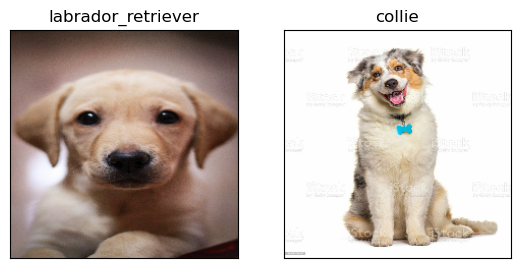

In [209]:
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_preds_labels[i])
    plt.imshow(image)